In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.svm import SVC


In [11]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [12]:
x= df["Text"]
y= df["Category"]
print(x.sample())
print(y.sample())


1031    mci shares climb on takeover bid shares in us ...
Name: Text, dtype: object
171    entertainment
Name: Category, dtype: object


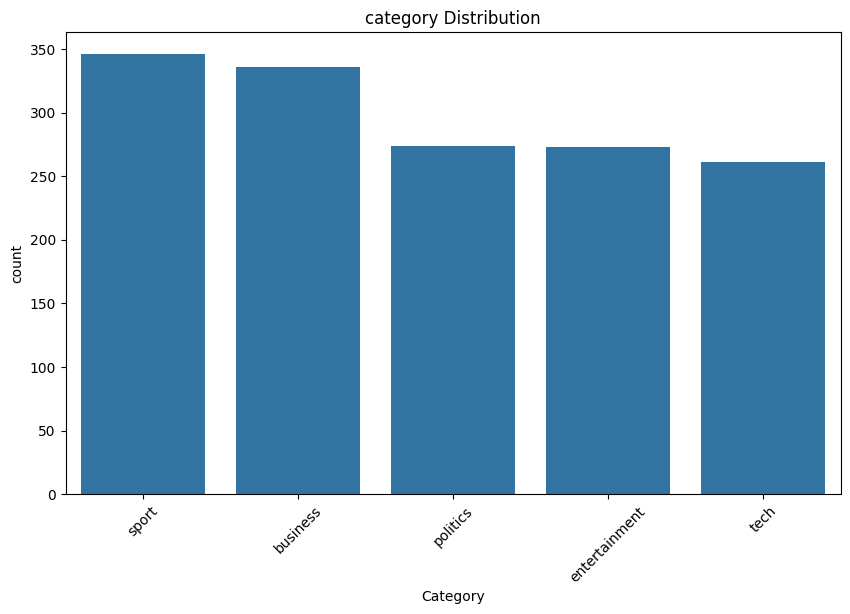

In [13]:
plt.figure(figsize= (10,6))
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.xticks(rotation= 45)
plt.title("category Distribution")
plt.show()

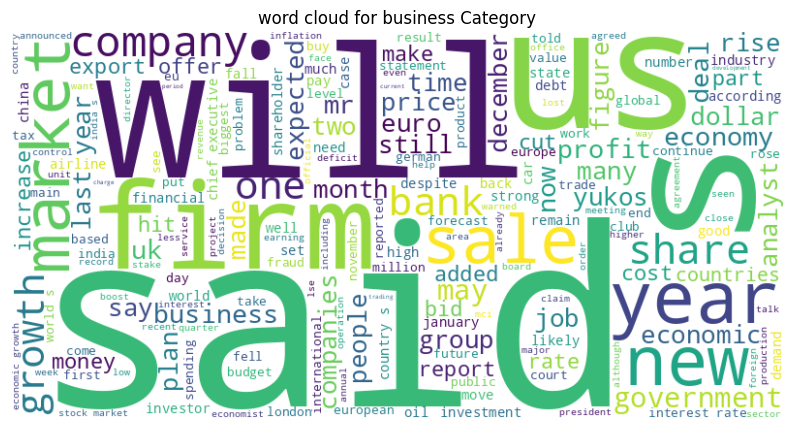

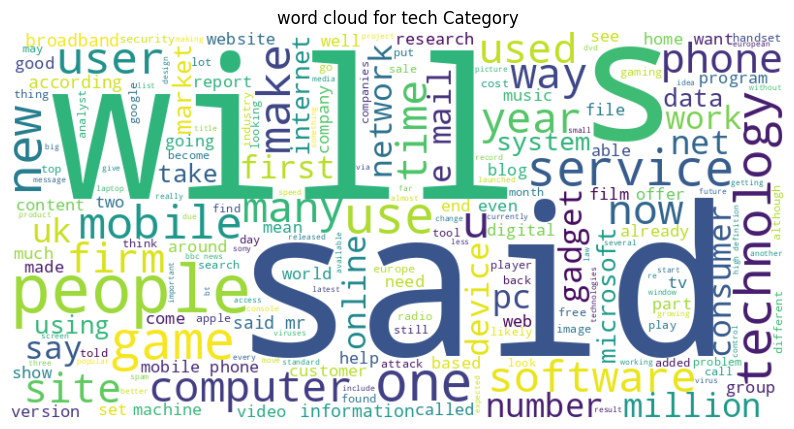

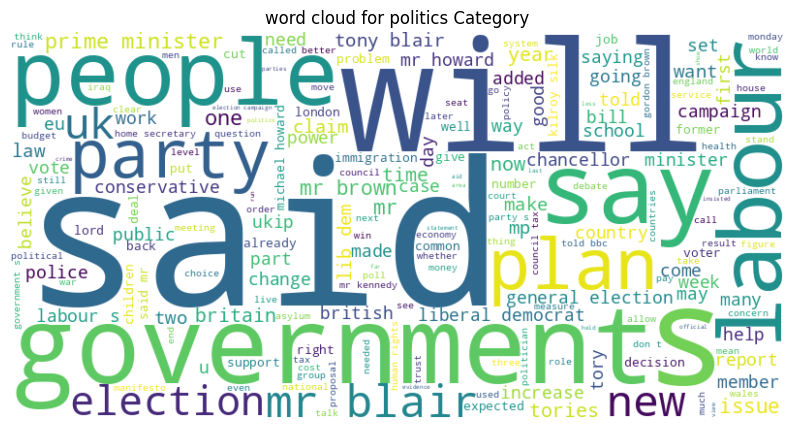

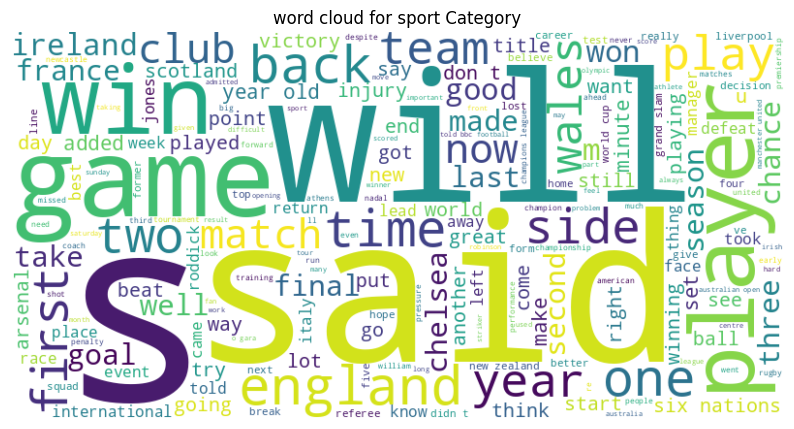

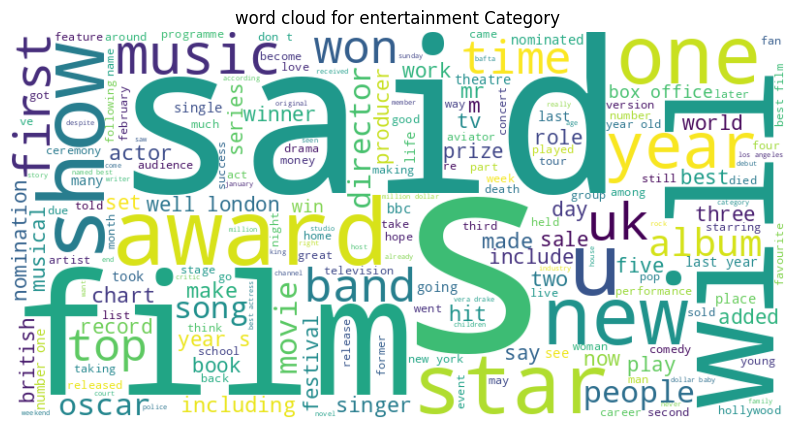

In [14]:
for category in df['Category'].unique():
    text= " ".join(df[df['Category']==category]['Text'].values)
    wordcloud=WordCloud(
        width=800,
        height= 400, 
        background_color = 'white'

    ).generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"word cloud for {category} Category")
    plt.axis('off')
    plt.show()

In [22]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words= set(stopwords.words("english"))


[nltk_data] Downloading package punkt to
[nltk_data]     /var/home/ramrshrcg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /var/home/ramrshrcg/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /var/home/ramrshrcg/nltk_data...


In [ ]:
nltk.download()

In [25]:
def preprocess_text(text):
    text = text.lower()
    text= re.sub(r'[^a-zA-Z\s]', '', text)
    words= word_tokenize(text)
    words= [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

print("Hello!! welcome to my words@@@ , 1234!")
print(preprocess_text("Hello!! welcome to my words@@@, 1234!"))

Hello!! welcome to my words@@@ , 1234!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/var/home/ramrshrcg/nltk_data'
    - '/var/home/ramrshrcg/Desktop/Python/.venv/nltk_data'
    - '/var/home/ramrshrcg/Desktop/Python/.venv/share/nltk_data'
    - '/var/home/ramrshrcg/Desktop/Python/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [26]:
lr_model = make_pipeline(TfidfVectorizer(stop_words='english'))
lr_model.fit(X_train, y_train)
y_pred_lr= lr_model.predict(X_test)

NameError: name 'X_train' is not defined

In [27]:
print("Accuracy = ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


NameError: name 'y_test' is not defined

In [28]:
new_texts=[
    'The latest football match ends with a thrilling 3-2 victory for the home team in which Real madrid wons agains mancity with aggregate score of 6-3.',
    'The government is so bad that I want to shit on the parliament while they are discussing about their stupid laws.',
]

new_predictions= lr_model.predict(new _texts)

for text, prediction in zip(new_texts, new_predictions):
    print (f'Text: {text} \n tprediction: {prediction}')

SyntaxError: invalid syntax (1011462421.py, line 6)